In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


In [29]:
df = pd.read_csv("HomeC.csv")

print("Columns:")
print(df.columns)

df.head()


Columns:
Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')


C:\Users\DELL\AppData\Local\Temp\ipykernel_5496\1741685076.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HomeC.csv")


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [30]:

datetime_col = df.columns[0]

df[datetime_col] = pd.to_datetime(df[datetime_col], unit='s', errors='coerce')

# Remove invalid rows
df = df.dropna(subset=[datetime_col])

df = df.sort_values(datetime_col)

df.set_index(datetime_col, inplace=True)

print("Time Range:", df.index.min(), "to", df.index.max())
print("Total Rows:", len(df))


Time Range: 2016-01-01 05:00:00 to 2016-01-02 11:13:12
Total Rows: 108793


In [31]:
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

print("Missing Values After Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64
Missing Values After Cleaning:
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0

C:\Users\DELL\AppData\Local\Temp\ipykernel_5496\268340345.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [32]:
numeric_df = df.select_dtypes(include=['float64','int64'])

# Remove duplicate timestamps
numeric_df = numeric_df[~numeric_df.index.duplicated(keep='first')]

numeric_df.head()


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:00:01,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:00:02,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:00:03,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:00:04,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0


In [33]:
hourly_data = numeric_df.resample('h').mean()
hourly_data = hourly_data.dropna(how='all')

print("Hourly Rows:", len(hourly_data))
hourly_data.head()


Hourly Rows: 31


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,1.187276,0.038035,1.187276,0.055087,0.209051,0.236018,0.091815,0.066464,0.019766,0.013373,...,33.010339,0.609728,9.905267,26.325956,1013.323967,7.733644,250.486667,0.000035,20.923411,0.000644
2016-01-01 06:00:00,1.119695,0.080241,1.119695,0.044929,0.237062,0.251944,0.131420,0.052407,0.019162,0.013601,...,18.775006,0.584022,9.916806,9.766472,1024.161161,8.287394,293.827222,0.000000,6.187989,0.000000
2016-01-01 07:00:00,0.953479,0.074560,0.953479,0.036512,0.225252,0.204517,0.100471,0.066452,0.017028,0.013425,...,24.236133,0.614706,9.929494,20.451156,1027.502767,3.838150,131.142778,0.000000,11.636817,0.000000
2016-01-01 08:00:00,1.080323,0.013110,1.080323,0.030701,0.157488,0.187387,0.097202,0.057517,0.021887,0.014500,...,39.956900,0.784944,8.501144,36.097106,1012.871561,6.648811,116.138889,0.010007,33.599206,0.147417
2016-01-01 09:00:00,1.064834,0.046615,1.064834,0.042406,0.236579,0.272748,0.099082,0.057820,0.015738,0.013374,...,24.463689,0.562878,9.119567,15.937556,1010.960267,9.551461,241.294444,0.000385,10.398067,0.014661


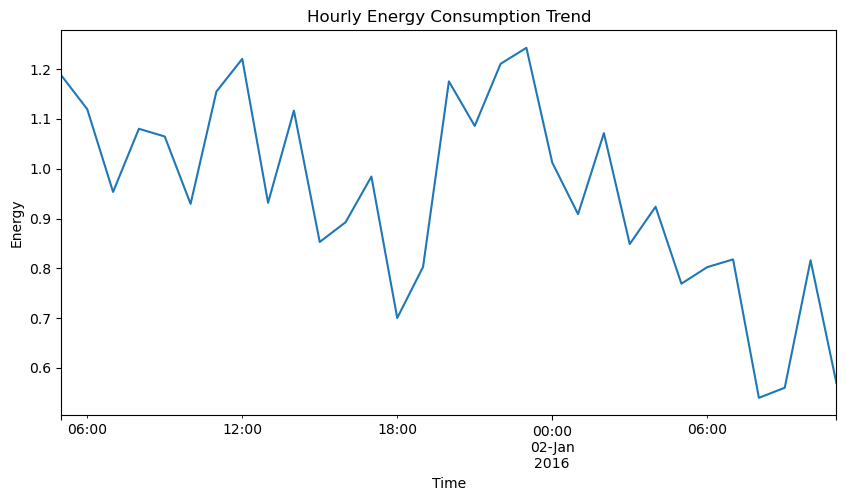

In [34]:
if len(hourly_data) > 10:
    plt.figure(figsize=(10,5))
    hourly_data.iloc[:, 0].plot()
    plt.title("Hourly Energy Consumption Trend")
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.show()
else:
    print("Not enough data to plot hourly trend.")


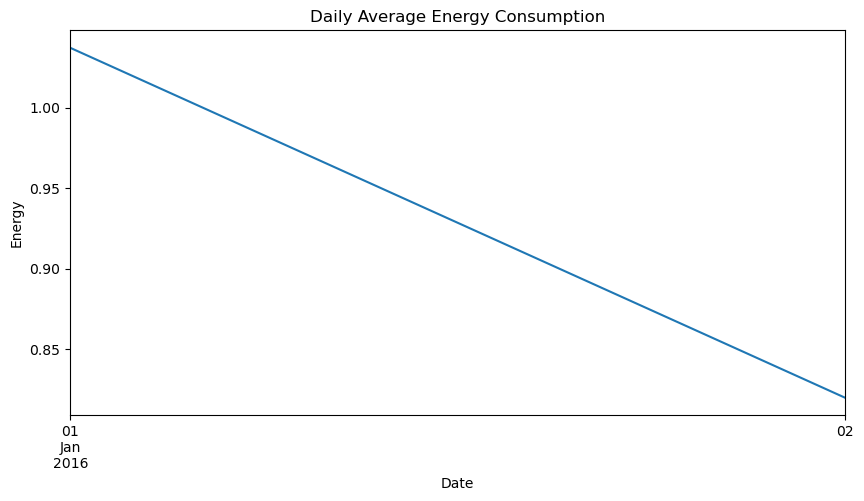

In [35]:
daily_data = numeric_df.resample('D').mean()
daily_data = daily_data.dropna(how='all')

if len(daily_data) > 1:
    plt.figure(figsize=(10,5))
    daily_data.iloc[:, 0].plot()
    plt.title("Daily Average Energy Consumption")
    plt.xlabel("Date")
    plt.ylabel("Energy")
    plt.show()


In [39]:
for col in hourly_data.columns:
    Q1 = hourly_data[col].quantile(0.25)
    Q3 = hourly_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    hourly_data[col] = hourly_data[col].clip(lower, upper)

print("Outlier treatment completed.")


Outlier treatment completed.


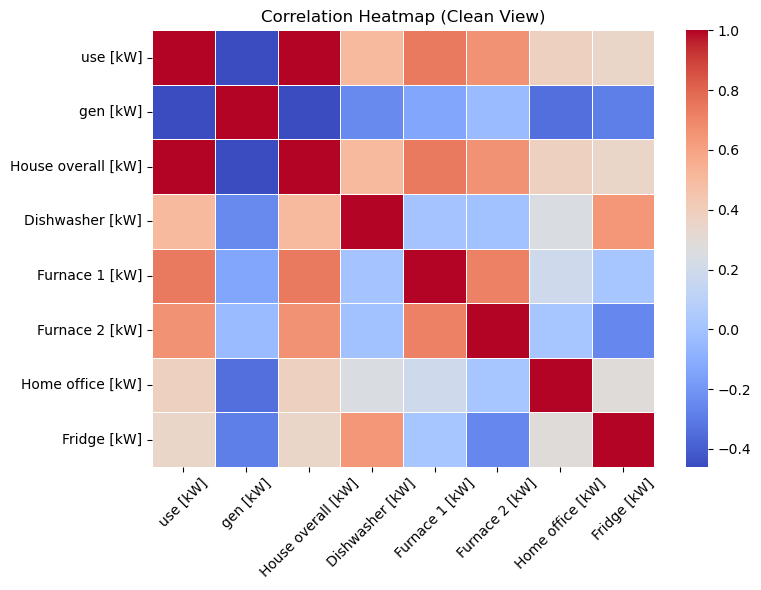

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    linewidths=0.5
)

plt.title("Correlation Heatmap (Clean View)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


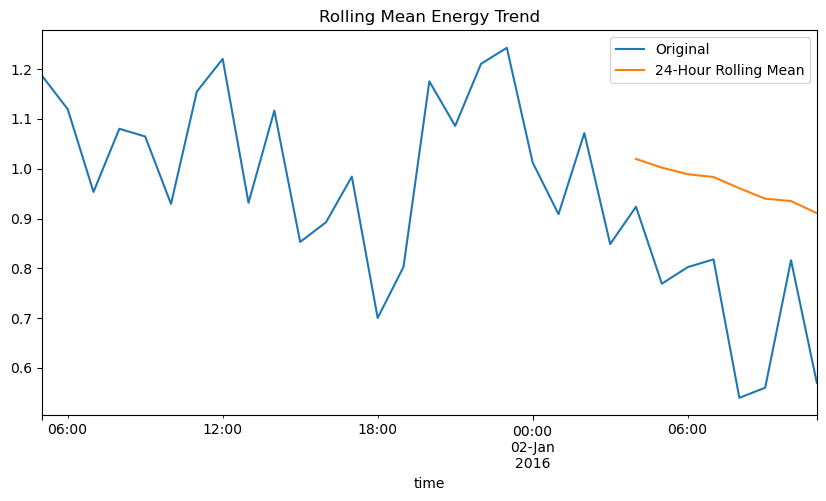

In [42]:
if len(hourly_data) > 24:
    rolling_mean = hourly_data.iloc[:, 0].rolling(window=24).mean()

    plt.figure(figsize=(10,5))
    hourly_data.iloc[:, 0].plot(label="Original")
    rolling_mean.plot(label="24-Hour Rolling Mean")
    plt.legend()
    plt.title("Rolling Mean Energy Trend")
    plt.show()


In [43]:
scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(hourly_data)

scaled_df = pd.DataFrame(scaled_values,
                         columns=hourly_data.columns,
                         index=hourly_data.index)

print("Scaling completed.")
scaled_df.head()


Scaling completed.


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.920837,0.202222,0.920837,0.792430,0.519096,0.575518,0.566954,1.000000,0.362403,0.281613,...,0.523587,0.360147,0.974323,0.479173,0.451986,0.461782,0.750341,0.003977,0.547613,0.003213
2016-01-01 06:00:00,0.824699,0.544638,0.824699,0.646211,0.594655,0.633312,1.000000,0.410917,0.308053,0.426753,...,0.230767,0.266276,0.979101,0.181702,0.850869,0.527426,0.929869,0.000000,0.211295,0.000000
2016-01-01 07:00:00,0.588248,0.498552,0.588248,0.525046,0.562797,0.461201,0.661603,0.999473,0.116087,0.314875,...,0.343102,0.378325,0.984354,0.373639,0.973863,0.000000,0.255989,0.000000,0.335658,0.000000
2016-01-01 08:00:00,0.768691,0.000000,0.768691,0.441401,0.380007,0.399036,0.625856,0.625047,0.553274,1.000000,...,0.666477,1.000000,0.392976,0.654700,0.435335,0.333183,0.193839,1.000000,0.836923,0.734930
2016-01-01 09:00:00,0.746657,0.271826,0.746657,0.609890,0.593353,0.708811,0.646413,0.637766,0.000000,0.282029,...,0.347783,0.189061,0.649021,0.292558,0.364986,0.677271,0.712265,0.043207,0.307385,0.073091


In [44]:
train_size = int(len(scaled_df) * 0.7)
val_size = int(len(scaled_df) * 0.15)

train = scaled_df.iloc[:train_size]
validation = scaled_df.iloc[train_size:train_size + val_size]
test = scaled_df.iloc[train_size + val_size:]

print("Train Shape:", train.shape)
print("Validation Shape:", validation.shape)
print("Test Shape:", test.shape)


Train Shape: (21, 28)
Validation Shape: (4, 28)
Test Shape: (6, 28)
